In [6]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ------- define paths -------
relative_path = Path('../data/intermediate_data/') # define relative path
absolute_path = relative_path.resolve() # get absolute path

# ------- import data -------
assess_df = pd.read_csv(absolute_path/'iac_assess_tidy.csv') # import IAC assess dataset
recc_ppi_df = pd.read_csv(absolute_path/'recc_ppi.csv') # import IAC recc dataset

In [4]:
# Rename year column and filter years 1990 - 2023
recc_ppi_df = recc_ppi_df.rename(columns={"fy": "year"})
recc_ppi_df = recc_ppi_df.loc[(recc_ppi_df['year'] >= 1990) & (recc_ppi_df['year'] <= 2023)]
# Filter the data based on impstatus for implemented vs not implemented
implemented_df = recc_ppi_df[recc_ppi_df['impstatus'] == 'I']
not_implemented_df = recc_ppi_df[recc_ppi_df['impstatus'] == 'N']

# Group by year and calculate the average payback period for both
avg_payback_implemented = implemented_df.groupby('year')['payback'].mean().reset_index()
avg_payback_not_implemented = not_implemented_df.groupby('year')['payback'].mean().reset_index()


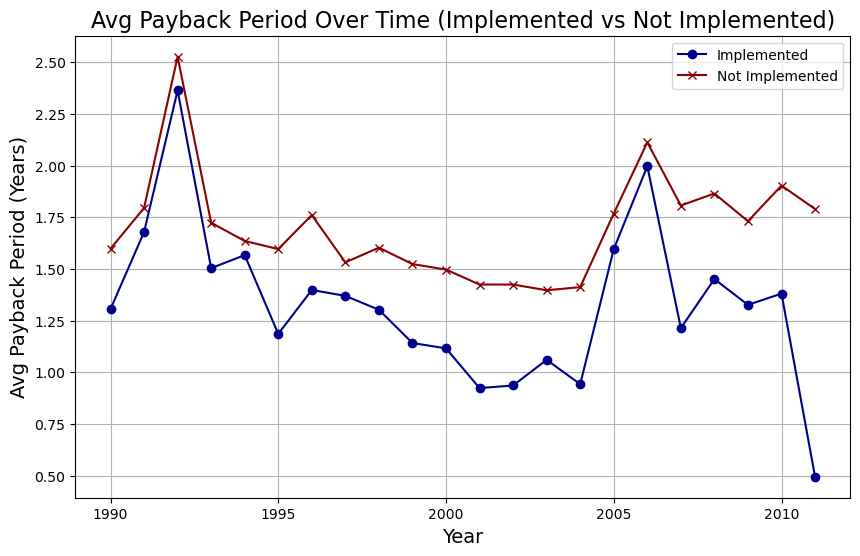

In [12]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Plot implemented projects
plt.plot(avg_payback_implemented['year'], avg_payback_implemented['payback'], label='Implemented', color='darkblue', marker='o')

# Plot not implemented projects
plt.plot(avg_payback_not_implemented['year'], avg_payback_not_implemented['payback'], label='Not Implemented', color='darkred', marker='x')

# Adding labels and title
plt.title('Avg Payback Period Over Time (Implemented vs Not Implemented)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Payback Period (Years)', fontsize=14)

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)

# Save image
plt.savefig('images/avg_payback_period.png')

# Show plot
plt.show()

